In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

image_height = 150  
image_width = 150    
batch_size = 10    
no_of_epochs  = 2  

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,         # 픽셀값 0~1 변환
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )
train_generator = train_datagen.flow_from_directory(
    'Data/CatDog/train',
    batch_size=10,      
    class_mode='binary', # binary, categorical
    target_size=(image_width, image_height))
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'Data/CatDog/test',
    batch_size=10,
    class_mode='binary',
    target_size=(image_width, image_height))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Found 8005 images belonging to 2 classes.


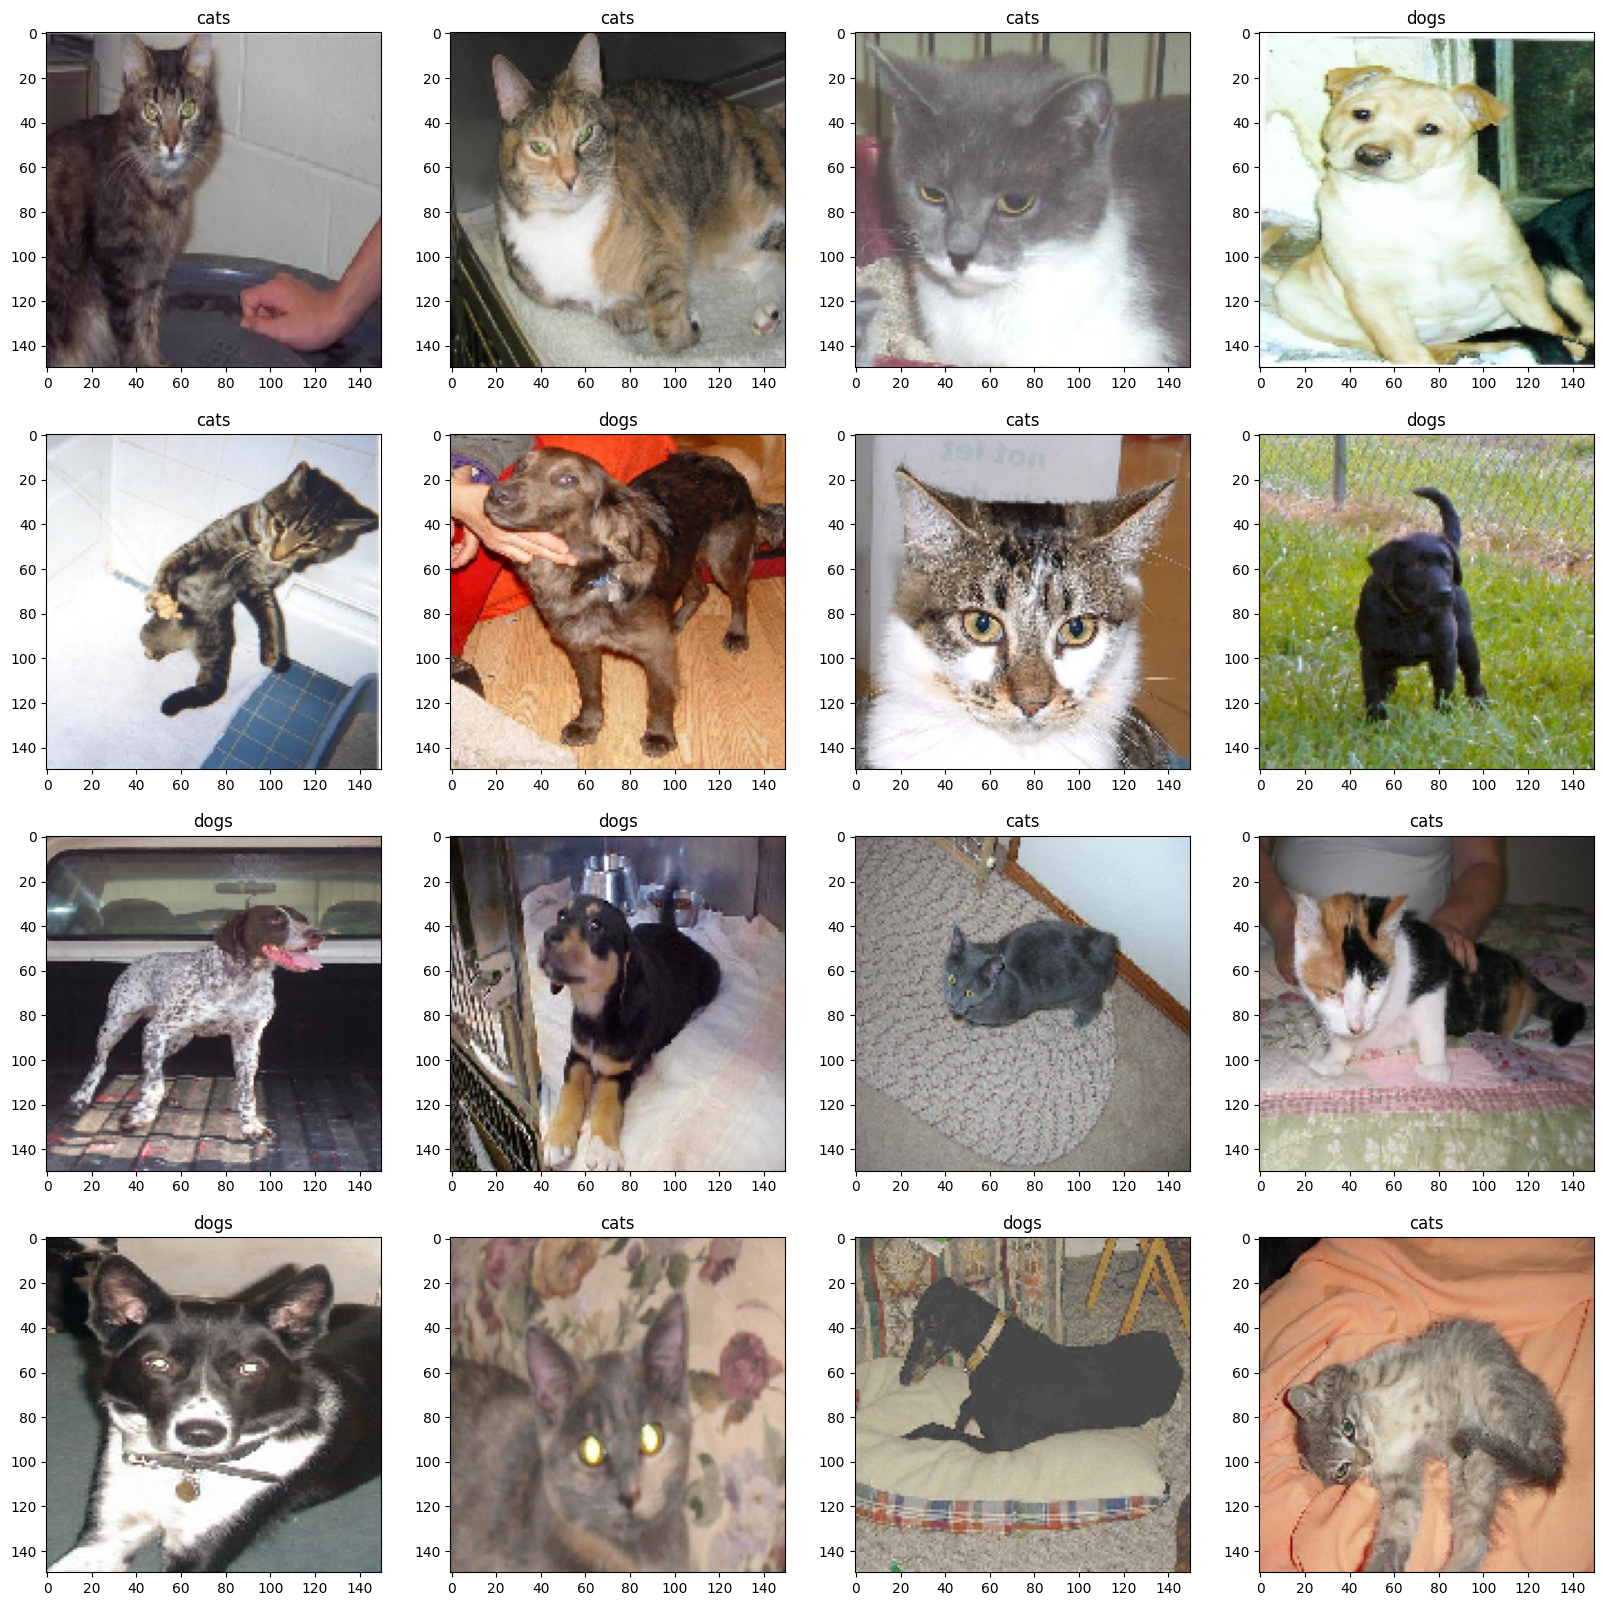

In [4]:
def findKey(indices, search_value):
    for key, value in indices.items():
        if(value == search_value):
            return key
    return -1

for X_batch, y_batch in ImageDataGenerator(rescale=1./255).flow_from_directory('Data/CatDog/train',batch_size=16, class_mode='binary', target_size=(150, 150)):
    plt.figure(figsize=(20,20))
    for i in range(0, 16):
        ax = plt.subplot(4, 4, i+1)
        ax.set_title(findKey(train_generator.class_indices, y_batch[i]))  
        plt.imshow((X_batch[i].reshape(150, 150, 3)*255).astype(np.uint8))
    plt.show()
    break

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height,image_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

c:\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=2000//batch_size,
                    epochs=no_of_epochs,
                    validation_data=test_generator,
                    validation_steps=800//batch_size,
                    callbacks=[monitor_val_acc])  

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8156\2556900944.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/2
200/200 [==============================] - 61s 228ms/step - loss: 0.6926 - accuracy: 0.5300 - val_loss: 0.6806 - val_accuracy: 0.5612
Epoch 2/2
200/200 [==============================] - 40s 199ms/step - loss: 0.6837 - accuracy: 0.5455 - val_loss: 0.6522 - val_accuracy: 0.6062


In [7]:
score = model.evaluate(test_generator, steps=800//batch_size, verbose=0)
score

[0.6583327651023865, 0.5837500095367432]

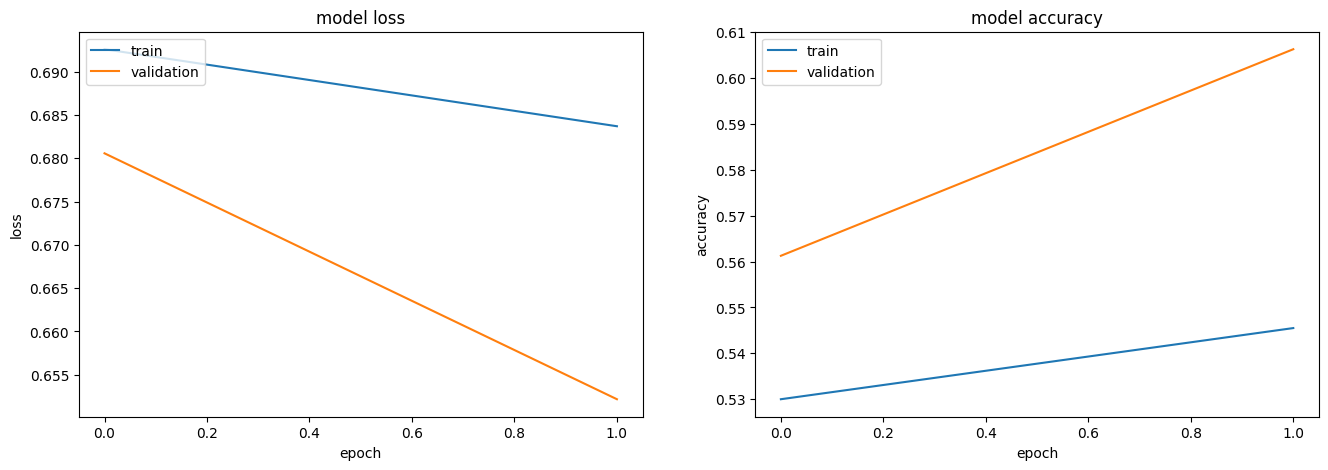

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

model.save('Data/result/Cats_vs_Dogs_model.h5')


In [9]:
predictions = model.predict(test_generator, steps=16, verbose=1)
print(predictions.shape)
print(predictions[0])
print(predictions[1])

16/16 [==============================] - 1s 21ms/step
(160, 1)
[0.47730637]
[0.46243638]
